<a href="https://colab.research.google.com/github/ad709kr/Health-insurance-cross-sell-prediction/blob/main/Heath_Insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member name**    - Adarsh Kumar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here : https://github.com/ad709kr/Health-insurance-cross-sell-prediction

# **Problem Statement**
Building a model to predict whether a customer would be interested in Vehicle Insurance or not. It will be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.


# **Business Context**
<br> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

## Data Description
<br>In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.
<br>**Attribute Information**:
<br>**id:**	Unique ID for the customer
<br>**Gender:**	Gender of the customer
<br>**Age:**	Age of the customer
<br>**Driving_License:** 0 : Customer does not have DL, 1 : Customer already has DL
<br>**Region_Code:**	Unique code for the region of the customer
<br>**Previously_Insured:**	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
<br>**Vehicle_Age:**	Age of the Vehicle
<br>**Vehicle_Damage:**	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
<br>**Annual_Premium:**	The amount customer needs to pay as premium in the year
<br>**Policy_Sales_Channel:**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
<br>**Vintage:**	Number of Days, Customer has been associated with the company
<br>**Response:**	1 : Customer is interested, 0 : Customer is not interested


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# model explainability
from sklearn.tree import export_graphviz
import shap 
import graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/classification_project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
data = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Dataset consist ", data.shape[0]," rows and ",data.shape[1],"columns.")

Dataset consist  381109  rows and  12 columns.


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data[data.duplicated()].count()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

There is no duplicate and missing value present in the given dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Observation:**
<br> (1) The customers age ranges from 20 to 85, however the 75% of the customer is in range of 20 to 49 years.
<br> (2) The minimum annual premium value is 2630 and goes up to 540165, however the 75% of people pays the premium in range of 2630 to 39400. For top 25% of customer the variation range is vary high.
<br> (3)vintage value varies in range of 10 to 299.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
cat_feat = ['Gender', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
       'Policy_Sales_Channel', 'Response']
for feat in cat_feat:
  print(feat)
  print(data[feat].value_counts())
  print("-"*50)

Gender
Male      206089
Female    175020
Name: Gender, dtype: int64
--------------------------------------------------
Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
--------------------------------------------------
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0   

**Inference:** 
<br> Age, Annual_premium feature is of numerical types and rest all are of the categorical types.


## ***3.Exploratory Data Analysis***

**Univariate analysis:**
<br> In this section, we plot each feature individually with  respect to the target variable which is the Response and see how these features impact the target variable.

In [12]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

#### Chart - 1 : Response
<br> Target variable, it is either 1 or 0. 1 means customer is interested and 0 means customer is not interested.

0    334399
1     46710
Name: Response, dtype: int64


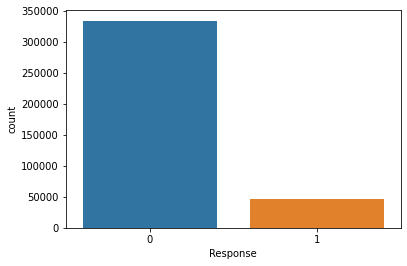

In [13]:
# Chart - 1 visualization code
sns.countplot(data['Response'])
print(data['Response'].value_counts())

In [14]:
print("Total ",round(data['Response'].value_counts()[1]*100/data.shape[0],2),"% of customer are interested in vehicle insurance")

Total  12.26 % of customer are interested in vehicle insurance


##### 1. Why did you pick the specific chart?

**Answer:** Since our target variable belongs to two categories i.e., classification task. To count the number of data belongs to which category the count plot is most suitable.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
<br> (1) Total 334399 customers are not interested and 46710 customers are interested in the vehicle insurance.
<br> (2) This is clearly a case of class imbalance where most of the customer are not interested in the product. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
 Knowing the percentage of customer who are interested will help the business which in this case is 12.26%.

#### Chart - 2 : Gender

<Figure size 432x288 with 0 Axes>

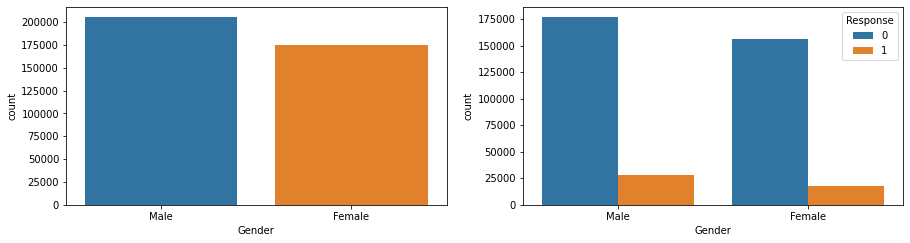

In [15]:
# Chart - 2 visualization code
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data['Gender'])

plt.subplot(222)
sns.countplot(x=data['Gender'],hue = data['Response'])

In [123]:
data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [124]:
yes = data[data['Response'] == 1]
male_yes = yes[yes['Gender'] == 'Male'].shape[0]
female_yes = yes[yes['Gender'] == 'Female'].shape[0]
print("out of ",data['Gender'].value_counts()['Male']," male candidates , only",male_yes,"responded positively which is approximately ", round(male_yes*100/data['Gender'].value_counts()['Male'],2),"%")
print("out of ",data['Gender'].value_counts()['Female']," female candidates , only",female_yes,"responded positively which is approximately ", round(female_yes*100/data['Gender'].value_counts()['Female'],2),"%")

out of  206089  male candidates , only 28525 responded positively which is approximately  13.84 %
out of  175020  female candidates , only 18185 responded positively which is approximately  10.39 %


##### 1. Why did you pick the specific chart?

**Answer:** needed count of the categorical variable so used countplot

##### 2. What is/are the insight(s) found from the chart?

**observation** 
<br> (1)The number of male customer is more as compared with the female customer.
<br> (2)The male customers are more interested to take the vehicle insurance than the female customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :**
<br> yes, male customers are more willing to buy the vehicle insurance as compared to females.

#### Chart - 3 : Age

<Figure size 432x288 with 0 Axes>

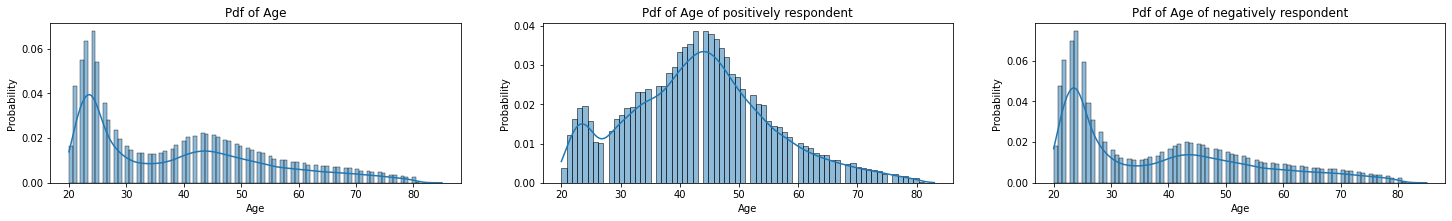

In [125]:
# Chart - 3 visualization code
def histplot(data,col,title):
  sns.histplot(x = data[col],kde =True, stat='probability',palette='tab10')
  plt.title(title)
data_yes = data[data['Response']==1]
data_no = data[data['Response']==0]

plt.figure(1)
plt.figure(figsize=(25,10))
plt.subplot(331)
histplot(data,'Age','Pdf of Age')

plt.subplot(332)
histplot(data_yes,'Age','Pdf of Age of positively respondent')

plt.subplot(333)
histplot(data_no,'Age','Pdf of Age of negatively respondent')

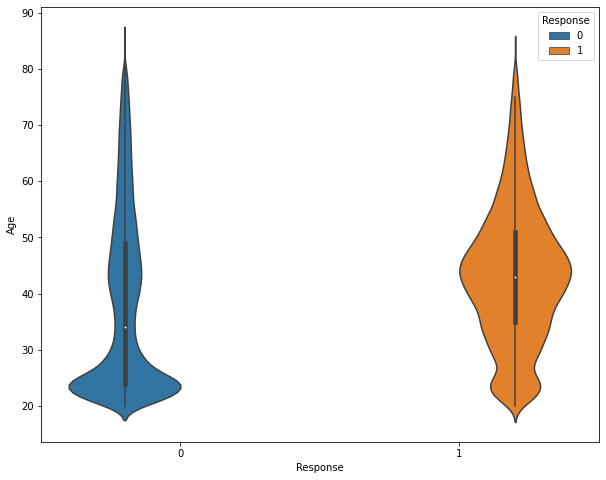

In [126]:
plt.figure(figsize=(10,8))
sns.violinplot(data = data, x = 'Response',y = 'Age', hue = 'Response')

##### 1. Why did you pick the specific chart?

**Answer :** Age is the numeric feature so pdf will be better visualization. So we plotted the Age for all data and with different response value individually.
<br> violinplot is combination of pdf + boxplot, so it will give the shape of pdf of the age and stats of box plot.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) Two peaks are observed for total responses of Age feature. One approximately at 25 and other at 45 (somewhere in 40-50)
<br> (2) for customer who responded positively the peak observed in between 40-50
<br> (2) for customer who responded negatively the pdf follows similar trend as total respondent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** The age group between 40-50 are showing more interest in vehicle insurance than the other age groups which might for segment the customer.

#### Chart - 4 : Driving License 


<Figure size 432x288 with 0 Axes>

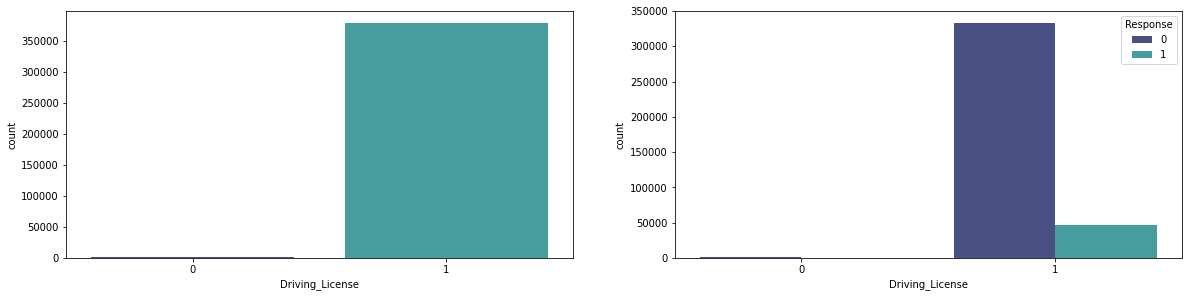

In [127]:
# Chart - 4 visualization code
plt.figure(1)
plt.figure(figsize= (20,10))
plt.subplot(221)
sns.countplot(data['Driving_License'], palette = "mako")

plt.subplot(222)
sns.countplot(x='Driving_License',hue='Response',data=data,palette="mako")

In [128]:
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [129]:
## Lets see the Customers who do not have the driving license and still interest in vehicle insurance
data_noDL = data[data['Driving_License'] == 0]
print("out of the 812 customer who does not have license ,", data_noDL[data_noDL['Response'] == 1].shape[0],"were still interested in vehicle Insurance")

out of the 812 customer who does not have license , 41 were still interested in vehicle Insurance


In [130]:
## Lets see the Customers who do not have the driving license and still interest in vehicle insurance
data_yesDL = data[data['Driving_License'] == 1]
print("out of the 380297 customer who does  have license ,", data_yesDL[data_yesDL['Response'] == 1].shape[0],"were interested in vehicle Insurance")

out of the 380297 customer who does  have license , 46669 were interested in vehicle Insurance


In [131]:
# calculate the percentage
print("The yes responded from the customers having license is",round(data_yesDL[data_yesDL['Response'] == 1].shape[0]*100/data['Driving_License'].value_counts()[1],2),"% and who does not have license are",round(data_noDL[data_noDL['Response'] == 1].shape[0]*100/data['Driving_License'].value_counts()[0],0),"%")

The yes responded from the customers having license is 12.27 % and who does not have license are 5.0 %


##### 1. Why did you pick the specific chart?

**Answer :** In this case variable is both the variable is categorical (Response, Driving_license) Hence we use countplot. 

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) 812 Customers does not have the driving license.
<br> (2) 41 customer out of the customer who do not have driving license were still interested in the vehicle insurance. 
<br> (3) out of the 380297 customer who does  have license , 46669 were interested in vehicle Insurance
<br> (4) there is high probability that person having license will show interest rather than customer who does not.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** Yes, targeting customer having deiving license have more chances to get positive response.

#### Chart - 5 : Region code

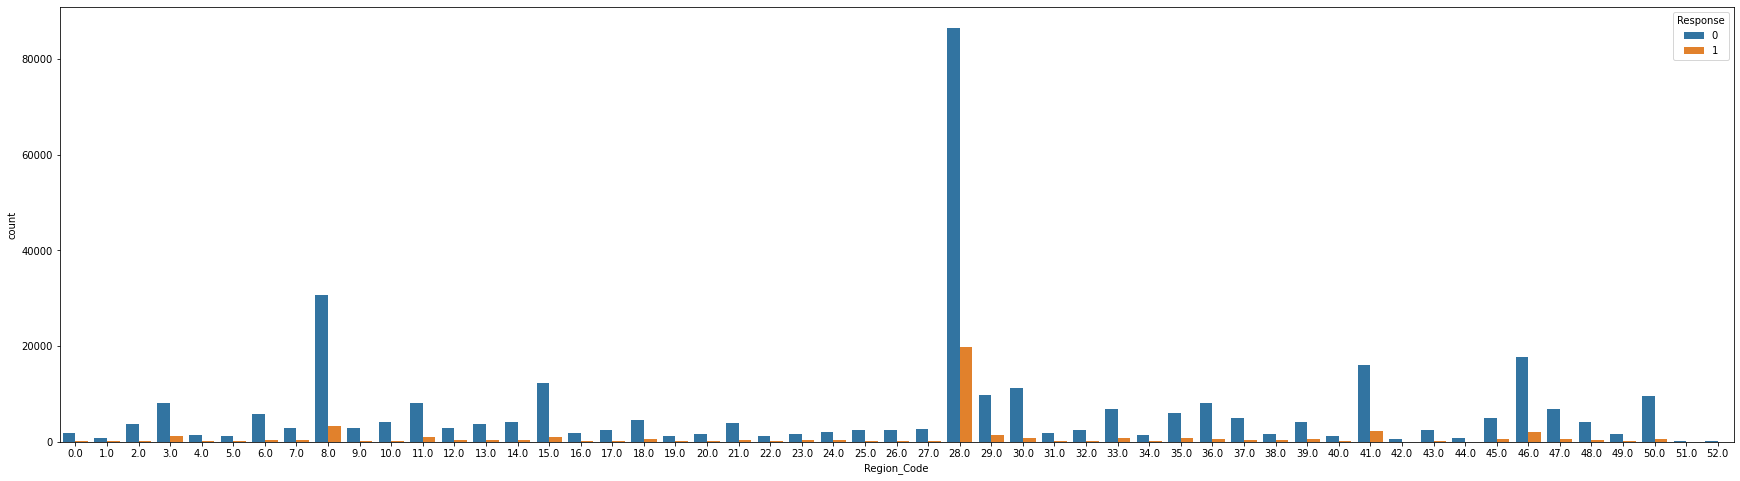

In [132]:
plt.figure(figsize = (30,8))
sns.countplot(data['Region_Code'], hue = data['Response'])

In [133]:
region_code_list = list(data['Region_Code'].unique())
len(region_code_list)

53

In [134]:
data['Region_Code'].value_counts().iloc[:5]

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
Name: Region_Code, dtype: int64

In [135]:
response_yes = data[data['Response'] == 1]
response_yes['Region_Code'].value_counts().iloc[:5]

28.0    19917
8.0      3257
41.0     2224
46.0     2032
29.0     1365
Name: Region_Code, dtype: int64

##### 1. Why did you pick the specific chart?

**Answer:** Because feature is categorical having many category.
 

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br> (1) out of total 53 region, region having Region_Code 28 has the maximum number of customer which is equal to 106415. And 19917 of these customers responded positively.
<br> (2) the top 5 region having maximum number of customer are not same as the top 5 region having positive response.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br>  Yes, It will help to target the customer based on the region and also help to understand the sentiment of customer about the product based on the region.

#### Chart - 6 : Previously_Insured

<Figure size 432x288 with 0 Axes>

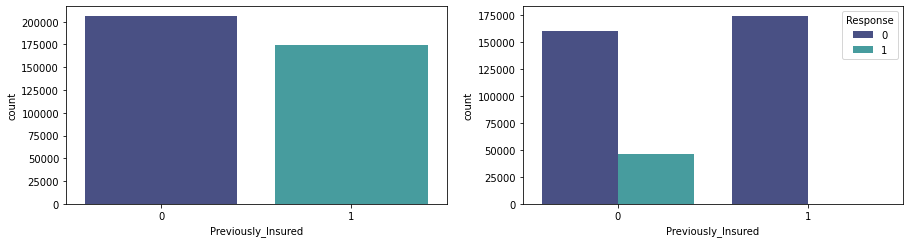

In [136]:
# Chart - 4 visualization code
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data['Previously_Insured'], palette = "mako")

plt.subplot(222)
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette="mako")


In [137]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [138]:
insur_yes = data[data['Previously_Insured']==1]
print("out of 174628 customer who have previously insured", insur_yes[insur_yes['Response']== 1].shape[0]," were responded positively approximately", round(insur_yes[insur_yes['Response']== 1].shape[0]*100/data['Previously_Insured'].value_counts()[1],2),"%")

out of 174628 customer who have previously insured 158  were responded positively approximately 0.09 %


In [139]:
insur_no = data[data['Previously_Insured']==0]
print("out of 206481 customer who have previously insured", insur_no[insur_no['Response']== 1].shape[0]," were responded positively approximately", round(insur_no[insur_no['Response']== 1].shape[0]*100/data['Previously_Insured'].value_counts()[1],2),"%")

out of 206481 customer who have previously insured 46552  were responded positively approximately 26.66 %


##### 1. Why did you pick the specific chart?

**Answer** we have to count the values from each categories.


##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) Customers who have not taken vehicle insurance previously are more interested in taking the vehicle_insurance.
<br>(2) Customers who have already taken vehicle insurance, very few of them are interested only 0.09%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** Yes, because it gives the information that most the customer are interested are not previously insured.


#### Chart - 7 :  Vehicle_Age

In [140]:
df= data.groupby('Vehicle_Age')['Response'].count()
df


Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Response, dtype: int64

In [141]:
response_yes = data[data['Response']==1]
df_yes = response_yes.groupby('Vehicle_Age')['Response'].count()

In [142]:
df_yes

Vehicle_Age
1-2 Year     34806
< 1 Year      7202
> 2 Years     4702
Name: Response, dtype: int64

In [143]:
df_yes['< 1 Year']

7202

Text(0.5, 1.0, 'pie chart Yes responded')

<Figure size 432x288 with 0 Axes>

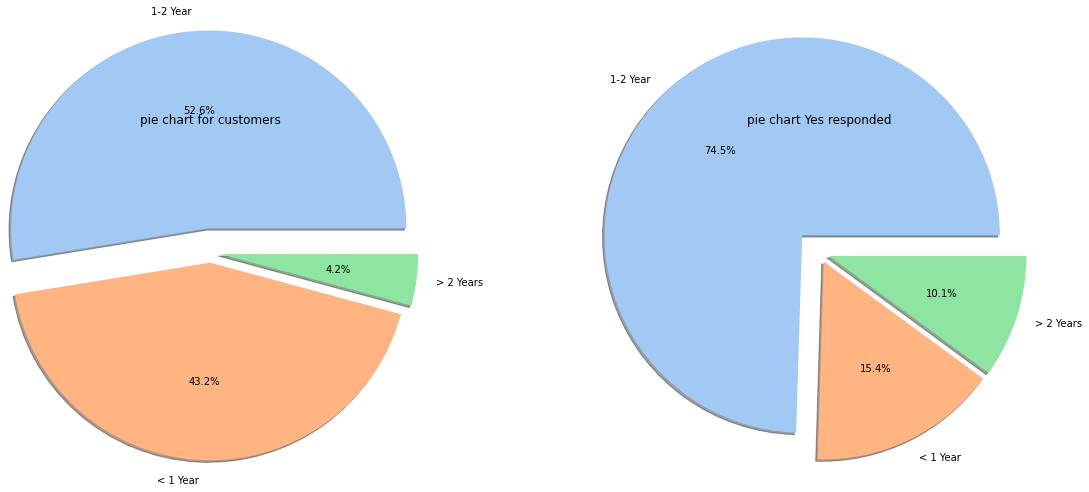

In [144]:
# Chart - 7 visualization code
plt.figure(1)
plt.figure(figsize= (20,10))

plt.subplot(221)
explode = [0.25,0.1,0.1]
colors = sns.color_palette('pastel')
plt.pie(df,labels = df.index,explode = explode,radius = 2,autopct='%1.1f%%',shadow = True ,colors = colors)
plt.title("pie chart for customers")
plt.subplot(222)
explode = [0.25,0.1,0.1]
colors = sns.color_palette('pastel')
plt.pie(df_yes,labels = df_yes.index,explode = explode,radius = 2,autopct='%1.1f%%',shadow = True ,colors = colors)
plt.title("pie chart Yes responded")

In [145]:
print("The proportion of positive respondent of vehicle_age less than 1 year is:",round(df_yes['< 1 Year']*100/df['< 1 Year'],2))
print('-'*100)
print("The proportion of positive respondent of vehicle_age in between 1 to 2 year is:",round(df_yes['1-2 Year']*100/df['1-2 Year'],2))
print('-'*100)
print("The proportion of positive respondent of vehicle_age greater than 2 year is:",round(df_yes['> 2 Years']*100/df['> 2 Years'],2))

The proportion of positive respondent of vehicle_age less than 1 year is: 4.37
----------------------------------------------------------------------------------------------------
The proportion of positive respondent of vehicle_age in between 1 to 2 year is: 17.38
----------------------------------------------------------------------------------------------------
The proportion of positive respondent of vehicle_age greater than 2 year is: 29.37


##### 1. Why did you pick the specific chart?

**Answer:** pie chart is very helpful to observe the result in terms of percentage.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br> (1) with increase in age of vehicle the proportion of customer who shows interest in vehicle_insurance increases like it is maximum in case of customer having vehicle age greater than 2 years and minimum for the customer having new vehicles (i.e., less than 1 year)
<br> (2) out of the total positive respondent the 74.5% have the vehicle of age 1-2 years. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** yes, it will help in creating the positive impact on the business because if we know that customer has the vehicle of age greater than 1 year it will be high probability that customer will be interested in vehicle insurance.

#### Chart - 8 : Vehicle_Damage


In [146]:
df_yes = response_yes.groupby('Vehicle_Damage')['Response'].count()

Text(0.5, 1.0, 'pie chart Yes responded')

<Figure size 432x288 with 0 Axes>

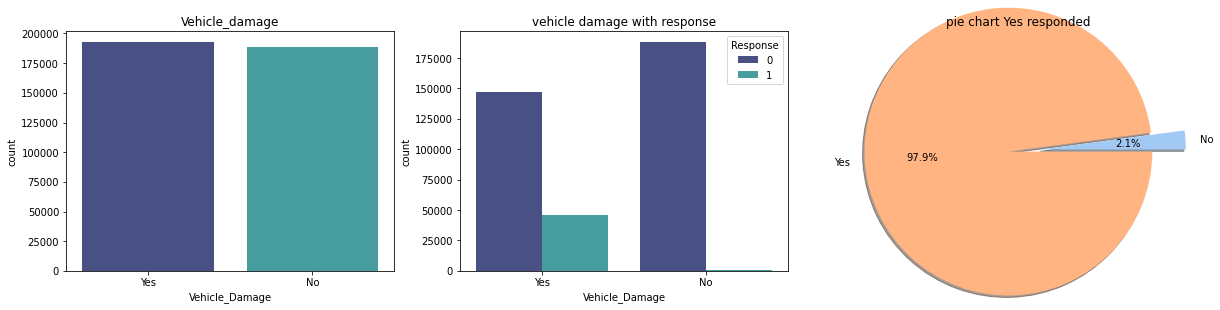

In [147]:
plt.figure(1)
plt.figure(figsize= (20,15))
plt.subplot(331)
sns.countplot(data['Vehicle_Damage'], palette = "mako")
plt.title('Vehicle_damage')

plt.subplot(332)
sns.countplot(x='Vehicle_Damage',hue='Response',data=data,palette="mako")
plt.title('vehicle damage with response')

plt.subplot(333)
explode = [0.25,0.1]
colors = sns.color_palette('pastel')
plt.pie(df_yes,labels = df_yes.index,explode = explode,radius = 1.5,autopct='%1.1f%%',shadow = True ,colors = colors)
plt.title("pie chart Yes responded")

In [148]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [149]:
df_yes  # those respondend positively to the vehicle_Insurance

Vehicle_Damage
No       982
Yes    45728
Name: Response, dtype: int64

##### 1. Why did you pick the specific chart?

**Answer:** count plot to count the various categorical values with the Response lebel and pie chart to find the proportions of positive respondent.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br> (1) out of total customer, 192413 have suffered from vehicle damage and 45728 of them are showing interest in the vehicle_insurance.
<br> (2) out of total customer, 188696 have not suffered from any vehicle_damage and only 982 of them are showing interest in vehicle damage.
<br> (3) out of total positive respondent, 97.9% of them suffered from vehicle damage previously. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> Yes, if customer have suffered from the vehicle damage previously there is high probability that they will be interested in vehicle insurance

#### Chart - 9 : Annual_Premium

Text(0.5, 1.0, 'Pdf of Annual_premium of negatively respondent')

<Figure size 432x288 with 0 Axes>

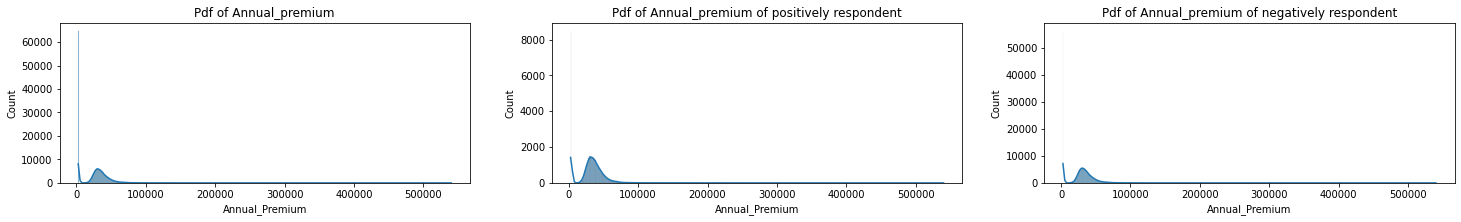

In [150]:
# Chart - 9 visualization code
data_yes = data[data['Response']==1]
data_no = data[data['Response']==0]

plt.figure(1)
plt.figure(figsize=(25,10))
plt.subplot(331)
sns.histplot(x = data['Annual_Premium'],kde =True, stat='count',palette='tab10')
plt.title('Pdf of Annual_premium')

plt.subplot(332)
sns.histplot(x = data_yes['Annual_Premium'],kde =True, stat='count',palette='tab10')
plt.title('Pdf of Annual_premium of positively respondent')

plt.subplot(333)
sns.histplot(x = data_no['Annual_Premium'],kde =True, stat='count',palette='tab10')
plt.title('Pdf of Annual_premium of negatively respondent')

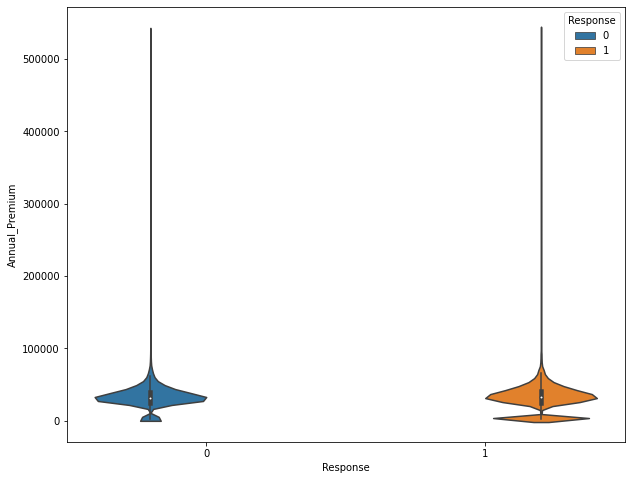

In [151]:
plt.figure(figsize=(10,8))
sns.violinplot(data = data, x = 'Response',y = 'Annual_Premium', hue = 'Response')

##### 1. Why did you pick the specific chart?

**Answer:** The Annual_premium is numerical in nature so to know the nature of distribution, firstly i plotted the combined response then seperately.
<br> violin plot gives the statistical information along with the pdf. 

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br> (1) There is no significant difference in the distributions each pdf, combined and seperately.
<br>(2) violin plots also shows that the median,Iqr and pdf looks similar.  


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** No, from annual subscription model there is not difference in the behaviour of the customer who shows interest in the vehicle insurance and those who do not. 

#### Chart - 10  : Policy_Sales_Channel
<br>Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

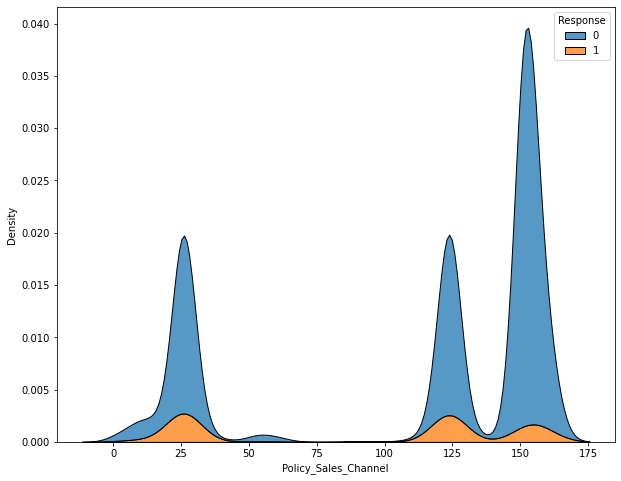

In [152]:
# Chart - 10 visualization code
plt.figure(figsize=(10,8))
sns.kdeplot(x='Policy_Sales_Channel',data=data,hue='Response',multiple='stack')

In [153]:
pol_data = data['Policy_Sales_Channel'].value_counts().to_frame().reset_index()
pol_data_yes = data_yes['Policy_Sales_Channel'].value_counts().to_frame().reset_index()

In [154]:
policy_sales = pol_data.merge(pol_data_yes, on ='index', how='left') 

In [155]:
# Lets add a column to find the converion rate of each policy_sales_channel
# Assuming conversion rate is the percentage of positive respondent out of the total customer reached by the particular policy sales
policy_sales['conversion_rate_in_perent'] = round(policy_sales['Policy_Sales_Channel_y']*100/policy_sales['Policy_Sales_Channel_x'],2)
ps_channel_x = policy_sales.sort_values(by='Policy_Sales_Channel_x', ascending=False)
ps_channel_y = policy_sales.sort_values(by='Policy_Sales_Channel_y', ascending=False)

Text(0.5, 1.0, 'Total customer reponded positively')

<Figure size 432x288 with 0 Axes>

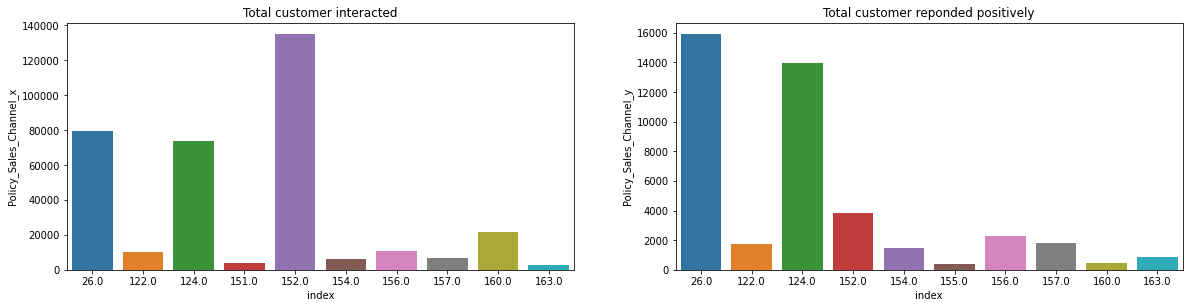

In [156]:
plt.figure(1)
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.barplot(data=ps_channel_x[:10], x= 'index',y='Policy_Sales_Channel_x')
plt.title("Total customer interacted")

plt.subplot(222)
sns.barplot(data=ps_channel_y[:10], x= 'index',y='Policy_Sales_Channel_y')
plt.title("Total customer reponded positively")

In [157]:
ps_channel_y[:10]

,index,Policy_Sales_Channel_x,Policy_Sales_Channel_y,conversion_rate_in_perent
1,26.0,79700,15891.0,19.94
2,124.0,73995,13996.0,18.91
0,152.0,134784,3858.0,2.86
4,156.0,10661,2297.0,21.55
6,157.0,6684,1794.0,26.84
5,122.0,9930,1720.0,17.32
7,154.0,5993,1474.0,24.60
9,163.0,2893,880.0,30.42
3,160.0,21779,475.0,2.18
16,155.0,1234,395.0,32.01


##### 1. Why did you pick the specific chart?

**Answer:** first plot which is kde plot use to get an approximate idea of the policy sales channel which were maximum, then further used barplot to plot the top 10 channels who contacted most customer and channels through which maaximum conversion happen.

##### 2. What is/are the insight(s) found from the chart?

**Answer :**
<br> (1) From kde plot, it can be seen that the maximum customer contacted by the policy_sales_channel 152, However maximum number of customer who responded positively were contacted by the policy_sales_channel 26.
<br> (2) the top 3 policy_sales_channel who contacted most of the customers are 152,26,54 and the top 3 through which maximum positive response were observed are 26,124,152.
<br> (3) the maximum conversion rate from top 10 policy_sales_channel belong to 163, Here total 2893 customer were contacted through this channel and 880 of them were interested making the conversion rate highest of 30.42%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** yes, the policy_sales_channel 26 got the maximum positive responses or the maximum rate of conversion belongs to policy_sales_channel 163.

#### Chart - 11 : Vintage
<br> Number of Days, Customer has been associated with the company

In [158]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

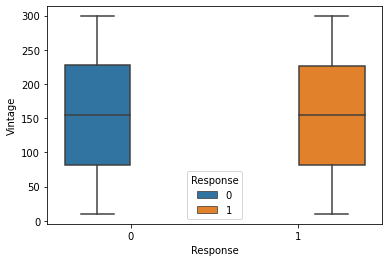

In [159]:
# Chart - 11 visualization code
sns.boxplot(data = data, x= 'Response',y = 'Vintage', hue = 'Response')

<Figure size 432x288 with 0 Axes>

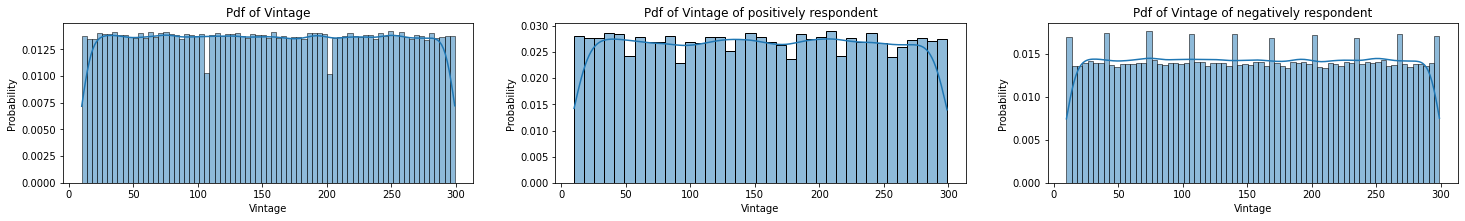

In [160]:
data_yes = data[data['Response']==1]
data_no = data[data['Response']==0]

plt.figure(1)
plt.figure(figsize=(25,10))
plt.subplot(331)
histplot(data,'Vintage','Pdf of Vintage')

plt.subplot(332)
histplot(data_yes,'Vintage','Pdf of Vintage of positively respondent')

plt.subplot(333)
histplot(data_no,'Vintage','Pdf of Vintage of negatively respondent')

##### 1. Why did you pick the specific chart?

**Answer :** Box plot give the statistical information about the numerical variable and from pdf it gives the distribution of it.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** All the distribution of vintage combined and for seperate distribution are similar.
<br> The median, IQR value do not have much difference in their value.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** No, it does not give any significance information which can impact the business positively or negatively.

**Biariate analysis:**

In [161]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

#### Chart - 12: Age vs driving license

Text(0.5, 1.0, 'Age vs Driving license of negatively respondent')

<Figure size 432x288 with 0 Axes>

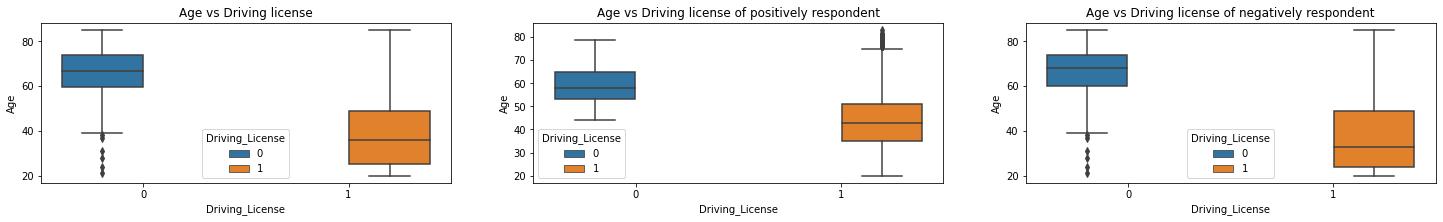

In [162]:
# Chart - 12 visualization code
data_yes = data[data['Response']==1]
data_no = data[data['Response']==0]

plt.figure(1)
plt.figure(figsize=(25,10))
plt.subplot(331)
sns.boxplot(data = data, x= 'Driving_License',y = 'Age', hue = 'Driving_License')
plt.title('Age vs Driving license')

plt.subplot(332)
sns.boxplot(data = data_yes, x= 'Driving_License',y = 'Age', hue = 'Driving_License')
plt.title('Age vs Driving license of positively respondent')

plt.subplot(333)
sns.boxplot(data = data_no, x= 'Driving_License',y = 'Age', hue = 'Driving_License')
plt.title('Age vs Driving license of negatively respondent')

##### 1. Why did you pick the specific chart?

**Answer:**  Here we have categorical numerical data for that boxplot will give a good statistical analysis.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br>(1) The median age of people not having driving license is approximately 65 but approximately 30 for people having driving license.
<br>(2) From Customer who responded positively, The median age is approximately 55 for customer having no license and approximately 40 for having license.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** Yes, positive respondent have a driving_license have median age approximately of 45 and who does not have driving_license have 58, so one can approach customer strategically.

#### Chart - 13 Numerical vs Numerical features

----------------------------------------------------------------------------------------------------


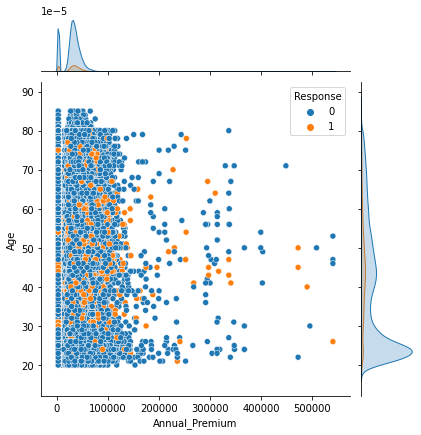

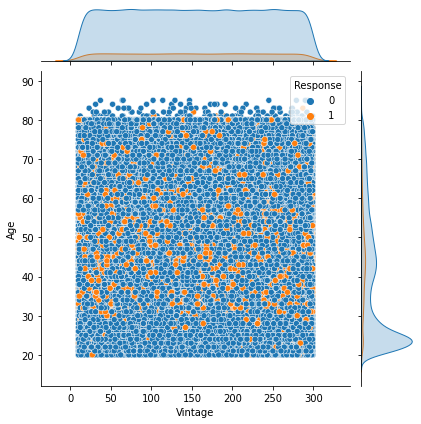

In [163]:
# Chart - 13 visualization code
sns.jointplot(data=data,x='Annual_Premium',y='Age', hue = 'Response')
print('-'*100)
sns.jointplot(data=data,x='Vintage',y='Age', hue = 'Response')

##### 1. Why did you pick the specific chart?

**Answer:** Age, vintage, Annual_premium are all numerical feature to plot the distribution of those the joint plot is convenient.

##### 2. What is/are the insight(s) found from the chart?

**Answer** 
<br> (1) Age feature has a skewed distribution, having peak approximately near 25.
<br> (2) Annual premium have two peaked distribution same for both responses. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** No, not such insight which immpact the business positively.

#### Chart - 14 - Correlation Heatmap

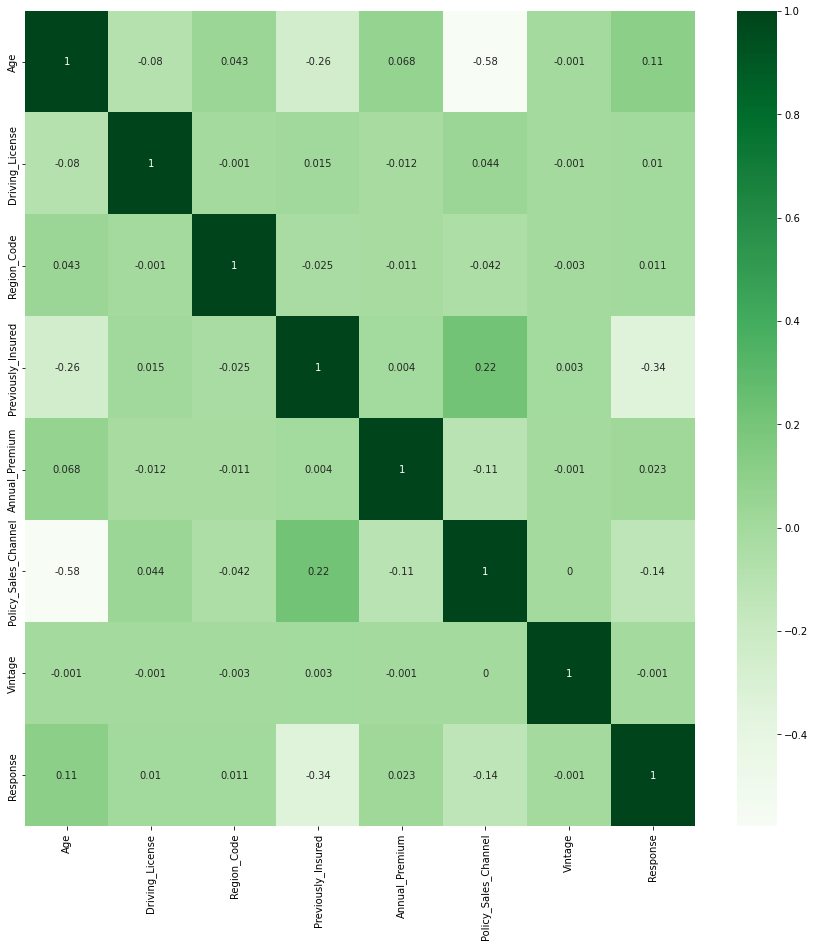

In [164]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
data.drop(['id'],axis=1,inplace=True)
corr = round(data.corr(),3)
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="Greens",annot=True)

##### 1. Why did you pick the specific chart?

**Answer Here:**To plot corelation matrix and identify the correlation value among the various plot.

##### 2. What is/are the insight(s) found from the chart?

**Answer** All the numerical columns are very weekly related to each other.

#### Chart - 15 - Pair Plot 

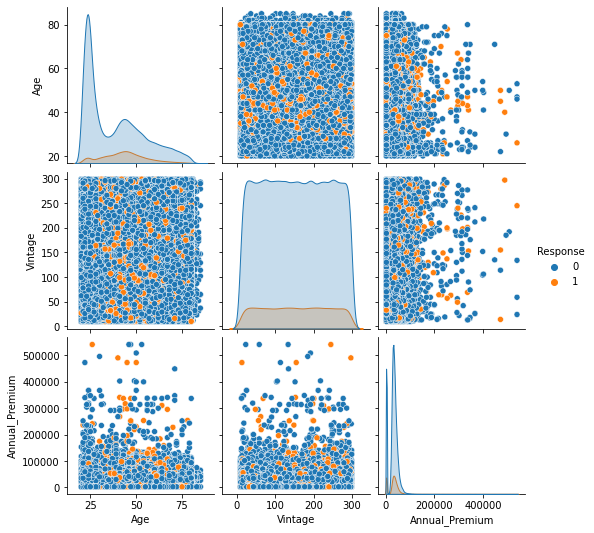

In [165]:
# Pair Plot visualization code
df = data[['Age','Vintage', 'Annual_Premium','Response']]
sns.pairplot(df,hue = 'Response')

##### 1. Why did you pick the specific chart?

**Answer:** To plot all the numerical feature simultaneously.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** No clear observation can be made from the above plot.

**Final observation from Exploratory data analysis:**
<br> 

*   The dataset is unbalanced, having only  12.26 % of customer are interested in vehicle insurance.
*   The age group between 40-50 are showing more interest in vehicle insurance than the other age groups which might for segment the customer.



*  only 41 person out of total who showed interest does not driving license.
*  out of total 53 region, region having Region_Code 28 has the maximum number of customer which is equal to 106415. And 19917 of these customers responded positively.


*   Customers who have not taken vehicle insurance previously are more interested in taking the vehicle_insurance.
*   Approximately 74.5% of people who responded positively have vehicle age in between 1-2 years.

*   the top 3 policy_sales_channel who contacted most of the customers are 152,26,54 and the top 3 through which maximum positive response were observed are 26,124,152.
*   The median age of people not having driving license is approximately 65 but approximately 30 for people having driving license.
  

*   From Customer who responded positively, The median age is approximately 55 for customer having no license and approximately 40 for having license.










---



## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [4]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer :** There is missing value present so no imputation technique used.

### 2. Handling Outliers

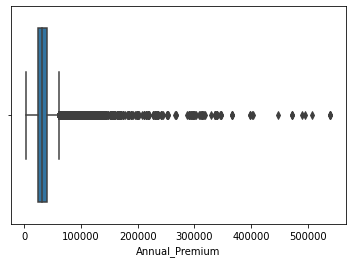

In [4]:
# Handling Outliers & Outlier treatments
sns.boxplot(data['Annual_Premium'])

In [5]:
# since there are many outliers that can be seen in the Annual_premium feature we will use this to remove using IQR method
def OutlierRemovaIQR(df,col):
    first_Quartile = df[col].quantile(0.25)
    third_Quartile = df[col].quantile(0.75)
    IQR = third_Quartile - first_Quartile
    low_lim = first_Quartile - 1.5 * IQR
    # considering minimum trip_duration of 15 second atleast
    if low_lim >=0:
      lower_lim = low_lim
    else:
      lower_lim = 0
    upper_limit = third_Quartile + 1.5* IQR
  
    df1 = df[(df[col]>lower_lim) & (df[col] < upper_limit)]
    data_loss = df.shape[0]-df1.shape[0]
    print("data loss by IQR method ", data_loss*100/df.shape[0])
    return df1


In [6]:
data1 = OutlierRemovaIQR(data,'Annual_Premium')

data loss by IQR method  2.70788672007221


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Answer:** we use inter quartile range technique for outlier removal using the Annual_Prremium feature. 

### 3. Numerical feature transformation

In [20]:
# Transform Your data
# we have 3 numerical feature lets perform box cox transform on all three feature to convert this in the normal form
def box_cox_transformation(data): 
  # transform training data & save lambda value
  fitted_data, fitted_lambda = stats.boxcox(data)
  ## Lets plot QQ plot to see the difference between both the plot

  plt.figure(1)
  plt.figure(figsize=(15,8))
  plt.subplot(221)
  stats.probplot(data, plot=plt)
  plt.title('QQ plot of original data')

  plt.subplot(222)
  stats.probplot(fitted_data, plot=plt)
  plt.title('QQ plot of transformed data')
  plt.show()
  return fitted_data

<Figure size 432x288 with 0 Axes>

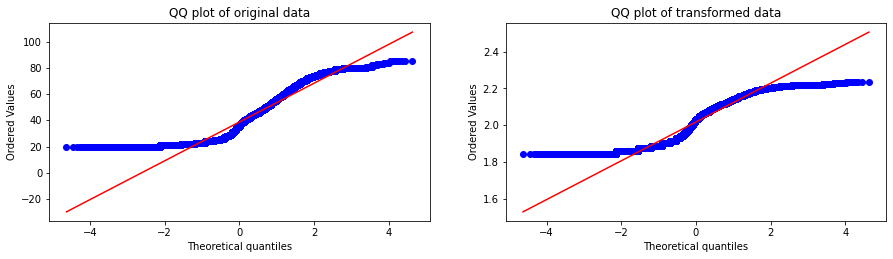

array([2.08070355, 2.2101594 , 2.09769287, ..., 1.86023313, 2.18581179,
       2.09219704])

In [21]:
# Age 
box_cox_transformation(data['Age'])

<Figure size 432x288 with 0 Axes>

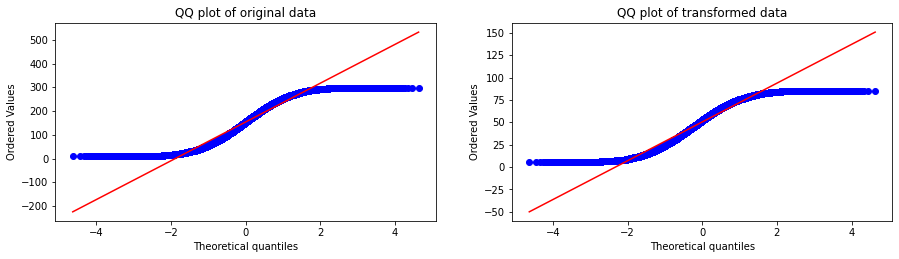

array([67.43271542, 59.41174749, 13.73765253, ..., 54.00480007,
       30.08881679, 71.98939709])

In [22]:
# vintage
box_cox_transformation(data['Vintage'])

<Figure size 432x288 with 0 Axes>

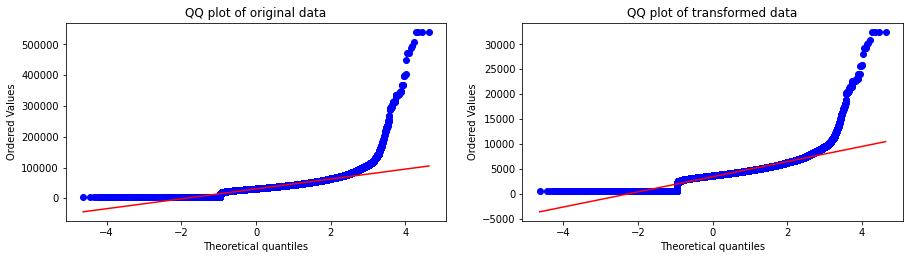

array([4449.43067899, 3853.17508374, 4266.01758828, ..., 3991.87101617,
       4796.64634354, 4560.64103269])

In [23]:
# Annual_Premium
box_cox_transformation(data['Annual_Premium'])

**Observation:** There is no much difference observed in the original value after the box cox transformation so will use the original data for training.


### 4. Categorical Encoding:
**Approach:** 
<br> 'Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage' : these features having only 2-3 different categories so we performed one hot encoding
<br> 'Region_Code','Policy_Sales_Channel' : are categorical feature with category 53 and 155 categories so for that we used response coding (given a category probability of it belonging to class 0 and 1) which will just create two features for one variable. 

In [7]:
# Encode your categorical columns
data1.columns 

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
#categorical feature except region_code and policy_sales_channel
categorical_feature = ['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage'] # Region_code and Policy_sales_channel have very high number of categorical so we will perform response coding on them 
health_df = data1

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_feature:
    data1 = one_hot_encoding(data1, col)
data1.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,28.0,40454.0,26.0,217,1,1,1,0,0,1,1
1,2,76,3.0,33536.0,26.0,183,0,1,1,0,0,0,0
2,3,47,28.0,38294.0,26.0,27,1,1,1,0,0,1,1
3,4,21,11.0,28619.0,152.0,203,0,1,1,1,1,0,0
4,5,29,41.0,27496.0,152.0,39,0,0,1,1,1,0,0


In [9]:
data1.shape

(370789, 13)

### 5. Data Splitting

In [10]:
y = data1['Response']  # seperating response as target variable
x = data1.drop(['Response'],axis=1)
print("The shape of the x and y are ", x.shape,'and',y.shape)

The shape of the x and y are  (370789, 12) and (370789,)


### 6. Handling Imbalanced Dataset
<br>we are using random oversampler in this case, which will create the duplication of the dataset. 


Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


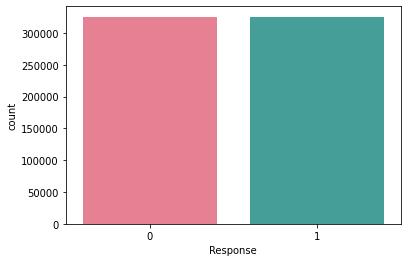

In [11]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [12]:
## train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new, test_size = 0.3,random_state = 42)
print('shape of x_train and y_train is',x_train.shape,"and",y_train.shape)
print('shape of x_test and y_test is',x_test.shape,"and",y_test.shape)

shape of x_train and y_train is (455887, 12) and (455887,)
shape of x_test and y_test is (195381, 12) and (195381,)


In [13]:

def ResponseCoding(x_train,x_test,y_train,col):

  ''' 
  This function will take x_train,x_test, y_train,col as input and return the probability of the category belonging to prticular class
  '''

    
  # creating 3 empty dictionary
  # total_count = unique category as key and total count as value
  total_count =dict()

  # count_1: category as key and number of times y_train = 1 as value
  count_1 =dict()

  # count_0: category as key and number of times y_train = 0 as value
  count_0 = dict()

  for i in range(x_train.shape[0]):
    ele = x_train[col].iloc[i]
    if ele in total_count.keys():
      total_count[ele] += 1
      if y_train.iloc[i] == 1:
        if ele in count_1.keys():
          count_1[ele] += 1
        else:
          count_1[ele] = 1
      else:
        if ele in count_0.keys():
          count_0[ele] += 1
        else:
          count_0[ele] =1
    
    else:
      total_count[ele] = 1
      
  # prob_0 : dictionary, key:unique category value: probability of belonging to class 0
  prob_0 = dict()
  # prob_1 : dictionary, key:unique category value: probability of belonging to class 1
  prob_1 = dict()

  for ele in total_count.keys():
    if ele in count_0.keys():
      prob_0[ele] = count_0[ele] / total_count[ele]
    else:
      prob_0[ele] = 0
    if ele in count_1.keys():
      prob_1[ele] = count_1[ele] / total_count[ele]
    else:
      prob_1[ele] = 0
  # creating the list of all different classes value
  x_train_prob_0 = []
  x_train_prob_1 = []
  x_test_prob_0 = []
  x_test_prob_1 = []
  for ele in x_train[col]:
    x_train_prob_0.append(prob_0[ele])
    x_train_prob_1.append(prob_1[ele])
  for ele in x_test[col]:
    if ele not in prob_0.keys():
      x_test_prob_0.append(0.5)
    else:
      x_test_prob_0.append(prob_0[ele])
    if ele not in prob_1.keys():
      x_test_prob_1.append(0.5)
    else:
      x_test_prob_1.append(prob_0[ele])
    

  return x_train_prob_0,x_train_prob_1, x_test_prob_0,x_test_prob_1


   

In [14]:
# for 'Region_Code'
region_train_0,region_train_1,region_test_0,region_test_1= ResponseCoding(x_train,x_test,y_train,'Region_Code') 
policy_train_0,policy_train_1,policy_test_0,policy_test_1= ResponseCoding(x_train,x_test,y_train,'Policy_Sales_Channel') 

In [15]:
region_train_0[:5]

[0.3753322911100997,
 0.6434165442976015,
 0.3753322911100997,
 0.3753322911100997,
 0.3753322911100997]

In [16]:
policy_test_0[:5]

[0.3734644182801485,
 0.824702146017293,
 0.3734644182801485,
 0.824702146017293,
 0.5283333333333333]

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Answer Here:**
<br>(1) 'Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage' : these features having only 2-3 different categories so we performed one hot encoding
<br>(2)'Region_Code','Policy_Sales_Channel' : are categorical feature with category 53 and 155 categories so for that we used response coding (given a category probability of it belonging to class 0 and 1) which will just create two features for one variable.

### 6. Data transformation

In [17]:
data1.columns

Index(['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [18]:
data_cat_x_train =np.asarray(x_train[['Gender_Male', 'Driving_License_1','Previously_Insured_1', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']])
data_cat_x_test = np.asarray(x_test[['Gender_Male', 'Driving_License_1','Previously_Insured_1', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']])

# Policy_Sales_Channel and Region_Code region_train_0,region_train_1,region_test_0,region_test_1
region_x_train_0 = np.asarray(region_train_0).reshape(-1,1)
region_x_train_1 = np.asarray(region_train_1).reshape(-1,1)
region_x_test_1 = np.asarray(region_test_1).reshape(-1,1)
region_x_test_0 = np.asarray(region_test_0).reshape(-1,1)


# policy_train_0,policy_train_1,policy_test_0,policy_test_1
policy_x_train_0 = np.asarray(policy_train_0).reshape(-1,1)
policy_x_train_1 = np.asarray(policy_train_1).reshape(-1,1)
policy_x_test_1 = np.asarray(policy_test_1).reshape(-1,1)
policy_x_test_0 = np.asarray(policy_test_0).reshape(-1,1)

# numerical feature
data_num_x_train = np.asarray(x_train[['Age', 'Vintage', 'Annual_Premium']])
data_num_x_test = np.asarray(x_test[['Age', 'Vintage', 'Annual_Premium']])

In [19]:
# stacking the data
x_train1 = np.hstack((data_cat_x_train,region_x_train_0,region_x_train_1,policy_x_train_0,policy_x_train_1,data_num_x_train))
x_test1 = np.hstack((data_cat_x_test,region_x_test_0,region_x_test_1,policy_x_test_0,policy_x_test_1,data_num_x_test))
print("The shape of x_train and x_test",x_train1.shape, "and", x_test1.shape)

The shape of x_train and x_test (455887, 13) and (195381, 13)


### 6. Data Scaling

In [20]:
# Scaling your data
## To remove scale effect lets normalize all the independent variable using MinMaxScalar()
scaler = MinMaxScaler()
x_train_final = scaler.fit_transform(x_train1)
x_test_final = scaler.transform(x_test1)

##### Which method have you used to scale you data and why?
<br> Answer: To remove the scale effect, we use MinMaxScalar

## ***7. ML Model Implementation***

<br> In this section we will train six models, these are
<br> (1) Logistic regression
<br> (2) Multinomial Naive Bayes
<br> (3) Decision Tree Classifier
<br> (4) Random Forest Classifier
<br> (5) xgboost

**Evaluation Metrics:**
<br> (1) roc_auc :Recievers operating characteristics area under curve
<br> (2) precison : ratio of true positive to sum of false positive and true positive which represents that out of total positive points model is predicting how many of them are actually positive. 
<br> (3) Recall : ratio of true positive to the total positive (actual).
<br> (4) accuracy : ratio of true prediction by total values.


In [39]:
def evaluation_matrix(y_train_pred, y_test_pred, y_train,y_test):
  '''
  This function take predicted and actual value and return the various evaluation metric along with the confusion matrix plot
  '''
  # (1)  calculating the train and test roc_auc score
  train_roc_auc = roc_auc_score(y_train,y_train_pred)
  test_roc_auc = roc_auc_score(y_test,y_test_pred)
  print(" The train and test roc_auc score are " ,train_roc_auc, " and ",test_roc_auc)

  # (2) calculating train and test precision score 
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test,y_test_pred)
  print(" The train and test precision score are " ,train_precision, " and ",test_precision)

  # (3) calculating train and test recall score
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test,y_test_pred)
  print(" The train and test Recall score are " ,train_recall, " and ",test_recall)

  # (4) calculating the train and test accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  print(" The train and test Accuracy score are " ,train_accuracy, " and ",test_accuracy)

  # (5) plotting the confusion matrix
  train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
  test_confusion_matrix = confusion_matrix(y_test,y_test_pred)
  plt.figure(1)
  plt.figure(figsize=(25,10))
  
  ax= plt.subplot(331)
  sns.heatmap(train_confusion_matrix, annot = True, fmt ='d', ax = ax)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_ylim(2.0, 0)
  ax.set_title('Train Confusion Matrix');
  ax.xaxis.set_ticklabels(['0','1']); 
  ax.yaxis.set_ticklabels(['0','1']);
  
  ax= plt.subplot(332)
  sns.heatmap(test_confusion_matrix, annot = True, fmt ='d', ax = ax)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_ylim(2.0, 0)
  ax.set_title('Test Confusion Matrix');
  ax.xaxis.set_ticklabels(['0','1']); 
  ax.yaxis.set_ticklabels(['0','1']);

  # (6) plot the train and test roc plot
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

  train_AUC_bow = auc(train_fpr, train_tpr)
  test_AUC_bow = auc(test_fpr, test_tpr)
  
  plt.subplot(333)
  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_AUC_bow))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_AUC_bow))
  plt.legend()
  plt.xlabel("False positive rate: FPR")
  plt.ylabel("True positive rate: FPR")
  plt.title("ERROR PLOTS")
  plt.grid()
  plt.show()
  return train_roc_auc,test_roc_auc, train_accuracy,test_accuracy, test_precision, test_recall


### ML Model - 1  : Logistic regression
<br> Logistic regression is the binary classification technique. In which we minimize the logistic cost function. It can be used with l1 and l2 regularization. 

In [40]:
# ML Model - 1 Implementation
def LogisticRegressionModel(x_train,x_test,y_train):
  ''' 
  This function trains the logistic regression model and return the predicted train and test value
  '''

  logistic = LogisticRegression()  # default value of C = 1.0
  # Fit the Algorithm
  logistic.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = logistic.predict(x_train)
  y_test_pred = logistic.predict(x_test)
  return y_train_pred,y_test_pred,logistic

y_train_pred_log,y_test_pred_log,LR = LogisticRegressionModel(x_train_final,x_test_final,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The train and test roc_auc score are  0.7939878608850591  and  0.7114037351372628
 The train and test precision score are  0.7365759538626269  and  0.7019701550765629
 The train and test Recall score are  0.9148514069268819  and  0.735942820331912
 The train and test Accuracy score are  0.7939313908929186  and  0.7114304870995645


<Figure size 432x288 with 0 Axes>

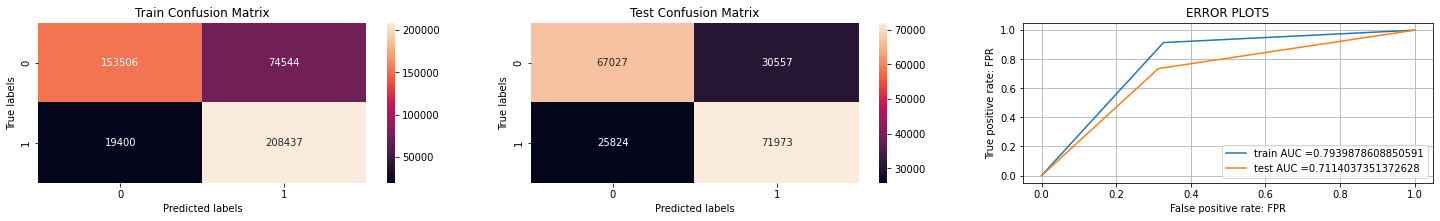

In [41]:
# evaluation matrix
train_roc_auc_log,test_roc_auc_log, train_accuracy_log,test_accuracy_log, test_precision_log, test_recall_log = evaluation_matrix(y_train_pred_log, y_test_pred_log, y_train,y_test)


#### 2. Cross- Validation & Hyperparameter Tuning

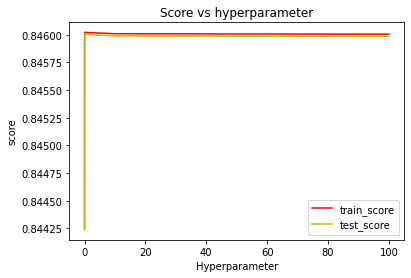

{'C': 0.1}
*** Scores from the best model ***
 The train and test roc_auc score are  0.7939614750255576  and  0.7820104352148868
 The train and test precision score are  0.736606590578929  and  0.7126731499233867
 The train and test Recall score are  0.9146890101256601  and  0.9464196243238545
 The train and test Accuracy score are  0.7939050685805913  and  0.7821896704387837


<Figure size 432x288 with 0 Axes>

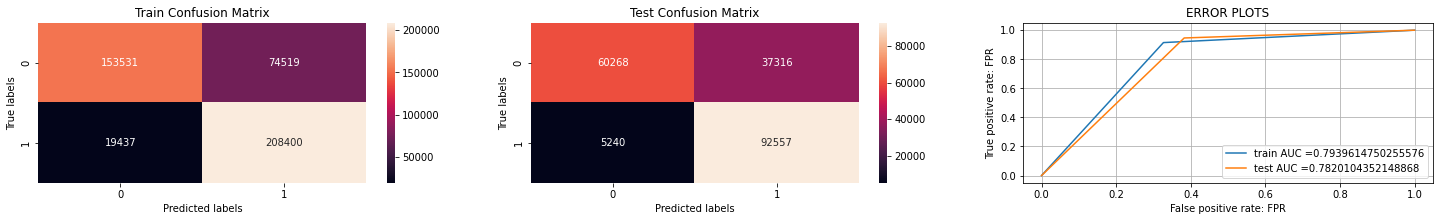

In [42]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# c is the hyper parameter for logistic regression
parameter = {'C' : [10**i for i in range(-3,3)]}

# calling the estimator
logistic = LogisticRegression()

# GridSearchCV
Gslr = GridSearchCV(estimator = logistic,param_grid = parameter,scoring ='roc_auc', refit = True, return_train_score = True)

# Fit the Algorithm
Gslr.fit(x_train_final,y_train)

# plotting the train and test score for various hyperparameter
result = pd.DataFrame(Gslr.cv_results_)
plt.plot(result['param_C'],result['mean_train_score'],'r',label = 'train_score')
plt.plot(result['param_C'],result['mean_test_score'],'y',label ='test_score')
plt.xlabel('Hyperparameter')
plt.ylabel('score')
plt.title('Score vs hyperparameter')
plt.legend()
plt.show()

# Predict on the model 
y_train_pred_log_gs = Gslr.predict(x_train_final)
y_test_pred_log_gs = Gslr.predict(x_test_final)

#print best alpha 
print(Gslr.best_params_)
print('*** Scores from the best model ***')
# evaluation metrics 
train_roc_auc_log_gs,test_roc_auc_log_gs, train_accuracy_log_gs,test_accuracy_log_gs, test_precision_log_gs, test_recall_log_gs = evaluation_matrix(y_train_pred_log_gs, y_test_pred_log_gs, y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

**Answer:**  used grid search crossvalidation technique for hyperparameter tuning. Since logistic regression has only one hyperparameter to tune it will take all the values from the list and train model and give the best model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer :** yes, there is significant improvement observed from hyperparameter tuning. the best param value obtained is C = 0.1 which gives approximately 8 % improvement in test score.

### ML Model - 2 : Multinomial Naive Bayes
<br> Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. 
In this case we will use multinomial naive bayes model with hyperparameter tuning.

In [43]:
def MultinomialNaiveBayes(x_train,x_test,y_train):
  ''' 
  This function trains the  Multinomial Naive Bayes model and return the predicted train and test value
  '''

  clf = MultinomialNB(fit_prior=True)   # the default value of alpha = 1
  # Fit the Algorithm
  clf.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = clf.predict(x_train)
  y_test_pred = clf.predict(x_test)
  return y_train_pred,y_test_pred,clf

y_train_pred_nb,y_test_pred_nb,NB = MultinomialNaiveBayes(x_train_final,x_test_final,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The train and test roc_auc score are  0.7704461090275618  and  0.7598897602525999
 The train and test precision score are  0.7215998848485939  and  0.7192776897098353
 The train and test Recall score are  0.880142382492747  and  0.8536867184064951
 The train and test Accuracy score are  0.7703948566201713  and  0.7599920156002886


<Figure size 432x288 with 0 Axes>

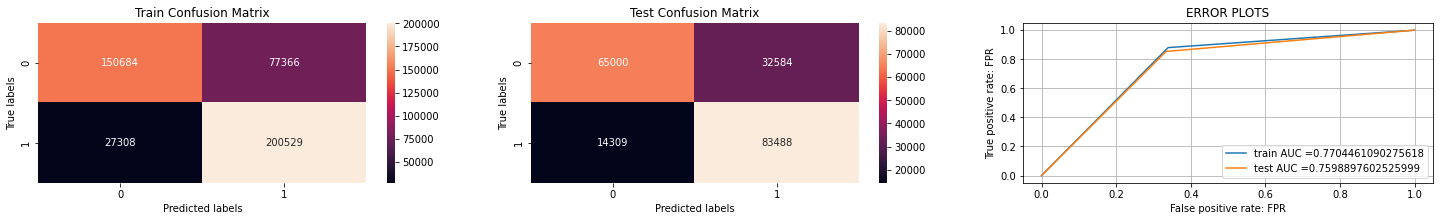

In [44]:
# Visualizing evaluation Metric Score chart
train_roc_auc_nb,test_roc_auc_nb, train_accuracy_nb,test_accuracy_nb, test_precision_nb, test_recall_nb = evaluation_matrix(y_train_pred_nb, y_test_pred_nb, y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

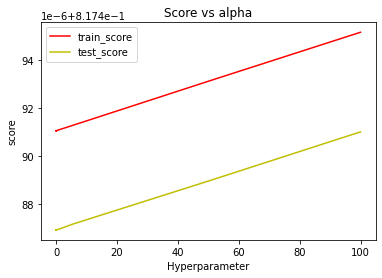

{'alpha': 100}
*** Scores from the best model ***
 The train and test roc_auc score are  0.7704834245997095  and  0.7600532193793964
 The train and test precision score are  0.7216105354058722  and  0.7193059502281925
 The train and test Recall score are  0.8802345536501973  and  0.8541468552205078
 The train and test Accuracy score are  0.770432146562635  and  0.7601557981584699


<Figure size 432x288 with 0 Axes>

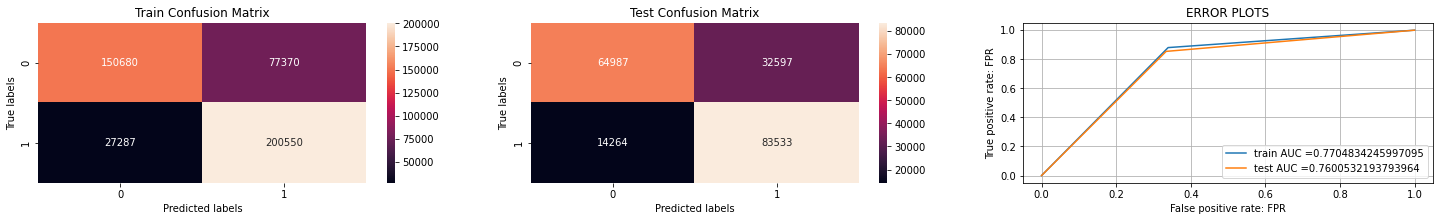

In [45]:
# c is the hyper parameter for logistic regression
parameter = {'alpha' : [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# calling the estimator
clf = MultinomialNB(fit_prior=True)

# GridSearchCV
Gsnb = GridSearchCV(estimator = clf,param_grid = parameter,scoring ='roc_auc', refit = True, return_train_score = True)

# Fit the Algorithm
Gsnb.fit(x_train_final,y_train)

# plotting the train and test score for various hyperparameter
result = pd.DataFrame(Gsnb.cv_results_)
plt.plot(result['param_alpha'],result['mean_train_score'],'r',label = 'train_score')
plt.plot(result['param_alpha'],result['mean_test_score'],'y',label ='test_score')
plt.xlabel('Hyperparameter')
plt.ylabel('score')
plt.title('Score vs alpha')
plt.legend()
plt.show()

# Predict on the model 
y_train_pred_nb_gs = Gsnb.predict(x_train_final)
y_test_pred_nb_gs = Gsnb.predict(x_test_final)

#print best alpha 
print(Gsnb.best_params_)
print('*** Scores from the best model ***')
# evaluation metrics 
train_roc_auc_nb_gs,test_roc_auc_nb_gs, train_accuracy_nb_gs,test_accuracy_nb_gs, test_precision_nb_gs, test_recall_nb_gs = evaluation_matrix(y_train_pred_nb_gs, y_test_pred_nb_gs, y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

**Answer:** used grid search crossvalidation technique for hyperparameter tuning. Since multinomial naive has only one hyperparameter to tune it will take all the values from the list and train model and give the best model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:** A very slight improvement (almost negligible) has been observed after the hyperparameter tuning. The best alpha value obtained from the hyperparameter tuning is 100.

### ML Model - 3 : Decision Tree Classifier
<br> Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables. 

In [46]:
def decisiontrees(x_train,x_test,y_train):
  ''' 
  This function trains the  Decision Tree Classifier model and return the predicted train and test value
  '''

  model = DecisionTreeClassifier(max_depth = 8,random_state = 42)   # for max_depth = none model was highly overfitting , so use a random depth = 8.

  # Fit the Algorithm
  model.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  return y_train_pred,y_test_pred,model

y_train_pred_dtc,y_test_pred_dtc,dtc = decisiontrees(x_train_final,x_test_final,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The train and test roc_auc score are  0.7999340114907325  and  0.7093114016364876
 The train and test precision score are  0.7381701269989609  and  0.7077595030350936
 The train and test Recall score are  0.9291203799207328  and  0.7141425606102436
 The train and test Accuracy score are  0.7998736529008285  and  0.7093166684580384


<Figure size 432x288 with 0 Axes>

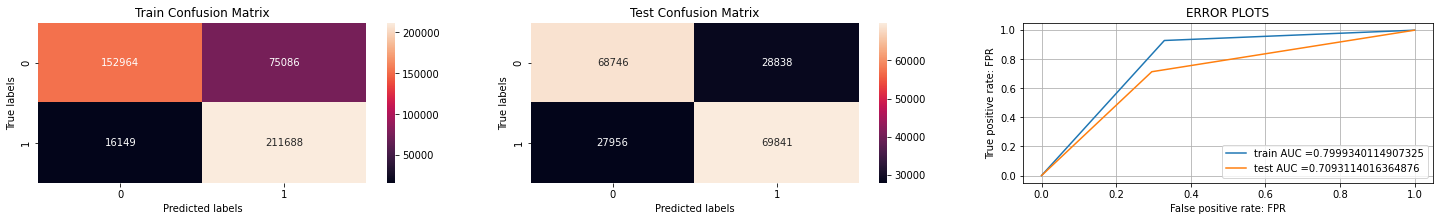

In [47]:
# Visualizing evaluation Metric Score chart
train_roc_auc_dtc,test_roc_auc_dtc, train_accuracy_dtc,test_accuracy_dtc, test_precision_dtc, test_recall_dtc = evaluation_matrix(y_train_pred_dtc, y_test_pred_dtc, y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

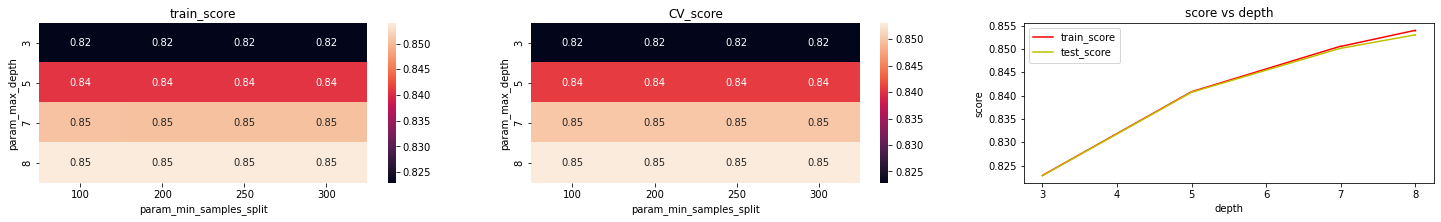

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The best parameters are: {'max_depth': 8, 'min_samples_split': 100}
The scores on best parameters are:
*** Scores from the best model ***
 The train and test roc_auc score are  0.7996354664163167  and  0.7211145239035529
 The train and test precision score are  0.7381156780222925  and  0.7156514205479043
 The train and test Recall score are  0.9283391196337732  and  0.7348384919782815
 The train and test Accuracy score are  0.799575333361118  and  0.7211294854668571


<Figure size 432x288 with 0 Axes>

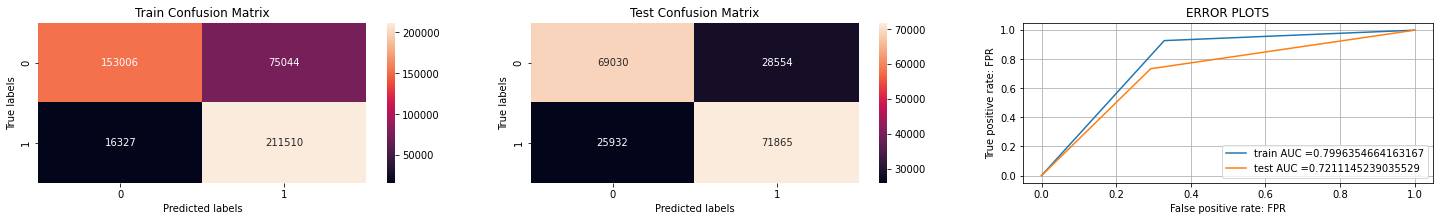

In [48]:
# c is the hyper parameter for logistic regression
parameter = {'max_depth' : [3,5,7,8], 'min_samples_split' : [100,200,250,300]}

# calling the estimator
dtc =  DecisionTreeClassifier(random_state = 42)

# GridSearchCV
Gsdtc = GridSearchCV(estimator =dtc, param_grid = parameter, scoring ='roc_auc', refit = True, return_train_score = True)

# Fit the Algorithm
Gsdtc.fit(x_train_final,y_train)

# plotting the train and test score for various hyperparameter
results = pd.DataFrame(Gsdtc.cv_results_)
train_score_dt = results['mean_train_score']
test_score_dt = results['mean_test_score']
best_max_depth = results['param_max_depth']
print("-"*100)
# Lets plot the results
plt.figure(1)
plt.figure(figsize=(25,10))

#heatmap 
plt.subplot(331)
dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_train_score')
ax = sns.heatmap(dataset_train, annot=True)
plt.title('train_score')

plt.subplot(332)
dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_test_score')
ax = sns.heatmap(dataset_train, annot=True)
plt.title('CV_score')
  
plt.subplot(333)
plt.plot(best_max_depth,train_score_dt,'r',label = 'train_score')
plt.plot(best_max_depth,test_score_dt,'y',label ='test_score')
plt.xlabel('depth')
plt.ylabel('score')
plt.title('score vs depth')
plt.legend()
plt.show()

print("-"*200)
print("The best parameters are:",Gsdtc.best_params_)
print("The scores on best parameters are:")

# Predict on the model 
y_train_pred_dtc_gs = Gsdtc.predict(x_train_final)
y_test_pred_dtc_gs = Gsdtc.predict(x_test_final)

#print best alpha 

print('*** Scores from the best model ***')
# evaluation metrics 
train_roc_auc_dtc_gs,test_roc_auc_dtc_gs, train_accuracy_dtc_gs,test_accuracy_dtc_gs, test_precision_dtc_gs, test_recall_dtc_gs = evaluation_matrix(y_train_pred_dtc_gs, y_test_pred_dtc_gs, y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

**Answer:** GridSearchCV technique used for hyper parameter tuning. since decision tree as a base model is fast so its better to search all posible combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer :** About 1% improvement is test score is observed after the hyperparameter tuning.

### ML Model - 4 : Random Forest Classifier:
<br> It is based on bagging technique in which the base model is decision tree of high depth.

In [49]:
def Randomforest(x_train,x_test,y_train):
  ''' 
  This function trains the  Random forest Classifier model and return the predicted train and test value
  '''

  model = RandomForestClassifier(max_depth = 10, n_estimators = 200, min_samples_split = 100,random_state = 42)   # using the best hyperparameter obtained from decision trees with n_estimator =200 

  # Fit the Algorithm
  model.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  return y_train_pred,y_test_pred,model

y_train_pred_rf,y_test_pred_rf,rf = Randomforest(x_train_final,x_test_final,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The train and test roc_auc score are  0.8036204956901738  and  0.7843402965535368
 The train and test precision score are  0.7382175502427293  and  0.7162694252230842
 The train and test Recall score are  0.9404135412597603  and  0.9430657382128286
 The train and test Accuracy score are  0.8035565831006368  and  0.7845133354829794


<Figure size 432x288 with 0 Axes>

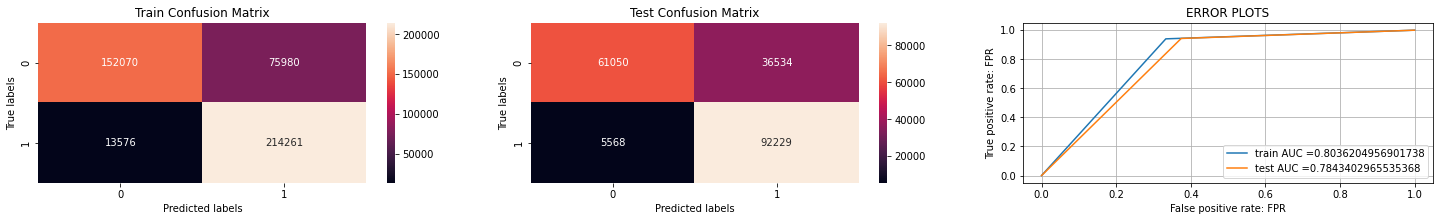

In [50]:
train_roc_auc_rf,test_roc_auc_rf, train_accuracy_rf,test_accuracy_rf, test_precision_rf, test_recall_rf = evaluation_matrix(y_train_pred_rf, y_test_pred_rf, y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

RandomForestClassifier(max_depth=13, min_samples_split=150, random_state=42)
 The train and test roc_auc score are  0.8089470844991493  and  0.77800588692959
 The train and test precision score are  0.7436199314380691  and  0.7300677788482667
 The train and test Recall score are  0.9425598124975312  and  0.883319529228913
 The train and test Accuracy score are  0.8088846578209073  and  0.7781206975089696


<Figure size 432x288 with 0 Axes>

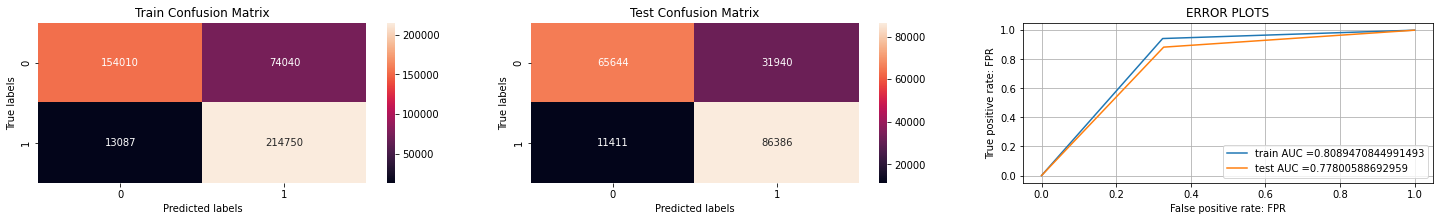

In [51]:
parameter = {'max_depth' : [8,10,11,13], 'n_estimators':[100,150,200,250],'min_samples_split': [100,150,200,300]}

model = RandomForestClassifier(random_state=42)

rand = RandomizedSearchCV(estimator = model, param_distributions = parameter,n_iter = 5, cv = 3,random_state= 42,n_jobs = -1,refit=True, return_train_score = True)
rand.fit(x_train_final,y_train)
print(rand.best_estimator_)
y_train_pred_cv_rf = rand.predict(x_train_final)
y_test_pred_cv_rf = rand.predict(x_test_final)
train_roc_auc_rf_cv,test_roc_auc_rf_cv, train_accuracy_rf_cv,test_accuracy_rf_cv, test_precision_rf_cv, test_recall_rf_cv = evaluation_matrix(y_train_pred_cv_rf, y_test_pred_cv_rf, y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

**Answer:** Used RandomizedSearhcv for the hyperparameter tuning because in case of random forest we can have a lot of combination of hyperparameter, so from those combination it selects set of hyperparameter randomly and train the model.  

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer :** No, there is not any improvement seen with the hyperparameter tuning, The original model was performing better.

### ML Model - 5 : xgboost Classifier:
<br> It is based on boosting technique in which the base model is decision tree of low depth.

In [52]:
def XGboost(x_train,x_test,y_train):
  ''' 
  This function trains the  xgboost Classifier model and return the predicted train and test value
  '''

  model = XGBClassifier(max_depth = 3, n_estimators = 500, min_samples_split = 100,learning_rate = 0.05,random_state = 42)    

  # Fit the Algorithm
  model.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  return y_train_pred,y_test_pred,model

y_train_pred_xb,y_test_pred_xb,xgb = XGboost(x_train_final,x_test_final,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The train and test roc_auc score are  0.8021990665622749  and  0.7756914702074604
 The train and test precision score are  0.7406736448938053  and  0.719349413838767
 The train and test Recall score are  0.9295505119888341  and  0.9053856457764553
 The train and test Accuracy score are  0.8021395652870119  and  0.7758328598993761


<Figure size 432x288 with 0 Axes>

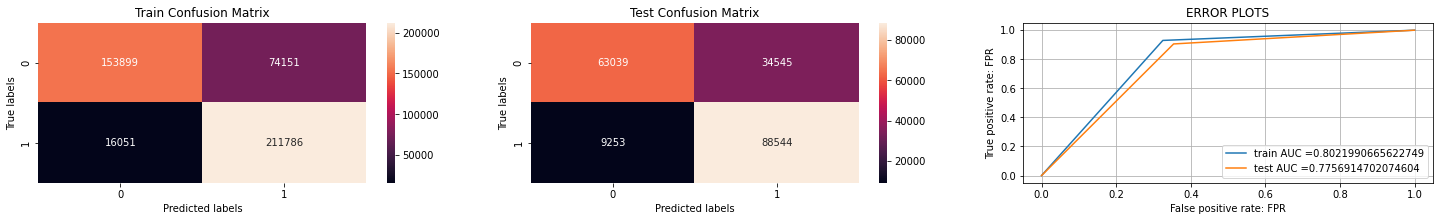

In [53]:
train_roc_auc_xb,test_roc_auc_xb, train_accuracy_xb,test_accuracy_xb, test_precision_xb, test_recall_xb = evaluation_matrix(y_train_pred_xb, y_test_pred_xb, y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

XGBClassifier(learning_rate=0.05, max_depth=4, min_samples_split=100,
              n_estimators=500, random_state=42)
 The train and test roc_auc score are  0.8055416074106923  and  0.769470641534782
 The train and test precision score are  0.7436657993437296  and  0.7236735039837261
 The train and test Recall score are  0.932052300548199  and  0.873022689857562
 The train and test Accuracy score are  0.8054824989525913  and  0.7695835316637749


<Figure size 432x288 with 0 Axes>

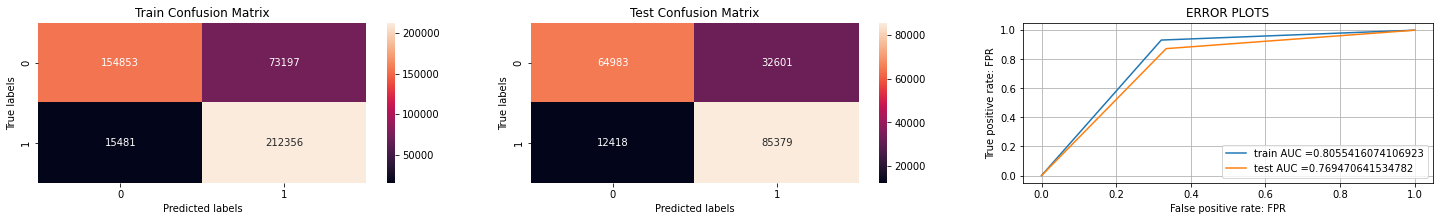

In [54]:
xgbc = XGBClassifier(random_state = 42)
parameter = {'max_depth' : [1,2,3,4,5], 'n_estimators':[300,350,500,700],'min_samples_split': [50,100,150], 'learning_rate' :[0.05,0.07,0.1]}
# using GridSearchCV will have 4*4*3*4 =192 models so will use RandomizedSearchCv for just 10 models to find the hyperparameter 
random = RandomizedSearchCV(estimator = xgbc, param_distributions = parameter, n_iter = 5,cv =3, refit = True,random_state= 42,n_jobs = -1, return_train_score = True)
random.fit(x_train_final,y_train)
print(random.best_estimator_)
y_train_pred_cv_xb = random.predict(x_train_final)
y_test_pred_cv_xb = random.predict(x_test_final)
train_roc_auc_rf_xb,test_roc_auc_xb_cv, train_accuracy_xb_cv,test_accuracy_xb_cv, test_precision_xb_cv, test_recall_xb_cv = evaluation_matrix(y_train_pred_cv_xb, y_test_pred_cv_xb, y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

**Answer:** Used RandomizedSearhcv for the hyperparameter tuning because in case of random forest we can have a lot of combination of hyperparameter, so from those combination it selects set of hyperparameter randomly and train the model. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:** Yes it shows approximately 1% of improvement over the base model without hyperparameter tuning.

**Combining Results**

In [55]:
print("-"*50,"Models without hyperparameter tuning ",'-'*50)
from prettytable import PrettyTable

Table = PrettyTable()

Table.field_names = ["Model ","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table.add_row(["Logistic Regression", round(train_roc_auc_log,6), round(test_roc_auc_log,6),round(train_accuracy_log,6),round(test_accuracy_log,6),round(test_precision_log,6),round(test_recall_log,6)])
Table.add_row(["Multinomial Naive Bayes",round(train_roc_auc_nb,6), round(test_roc_auc_nb,6),round(train_accuracy_nb,6),round(test_accuracy_nb,6),round(test_precision_nb,6),round(test_recall_nb,6)])             
Table.add_row(["Decision tree ", round(train_roc_auc_dtc,6), round(test_roc_auc_dtc,6),round(train_accuracy_dtc,6),round(test_accuracy_dtc,6),round(test_precision_dtc,6),round(test_recall_dtc,6)])
Table.add_row(["Random forest", round(train_roc_auc_rf,6), round(test_roc_auc_rf,6),round(train_accuracy_rf,6),round(test_accuracy_rf,6),round(test_precision_rf,6),round(test_recall_rf,6)])
Table.add_row(["xgboost",round(train_roc_auc_xb,6), round(test_roc_auc_xb,6),round(train_accuracy_xb,6),round(test_accuracy_xb,6),round(test_precision_xb,6),round(test_recall_xb,6)])

print(Table)

-------------------------------------------------- Models without hyperparameter tuning  --------------------------------------------------
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|          Model          | Train roc_auc | Test roc_auc | Train accuracy | Test accuracy | Test precision | Test Recall |
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|   Logistic Regression   |    0.793988   |   0.711404   |    0.793931    |    0.71143    |    0.70197     |   0.735943  |
| Multinomial Naive Bayes |    0.770446   |   0.75989    |    0.770395    |    0.759992   |    0.719278    |   0.853687  |
|      Decision tree      |    0.799934   |   0.709311   |    0.799874    |    0.709317   |    0.70776     |   0.714143  |
|      Random forest      |    0.80362    |   0.78434    |    0.803557    |    0.784513   |    0.716269    |   0.943066  |

In [56]:
print("-"*50,"Models with hyperparameter tuning ",'-'*50)

Table = PrettyTable()

Table.field_names = ["Model ","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table.add_row(["Logistic Regression", round(train_roc_auc_log_gs,6), round(test_roc_auc_log_gs,6),round(train_accuracy_log_gs,6),round(test_accuracy_log_gs,6),round(test_precision_log_gs,6),round(test_recall_log_gs,6)])
Table.add_row(["Multinomial Naive Bayes",round(train_roc_auc_nb_gs,6), round(test_roc_auc_nb_gs,6),round(train_accuracy_nb_gs,6),round(test_accuracy_nb_gs,6),round(test_precision_nb_gs,6),round(test_recall_nb_gs,6)])             
Table.add_row(["Decision tree ", round(train_roc_auc_dtc_gs,6), round(test_roc_auc_dtc_gs,6),round(train_accuracy_dtc_gs,6),round(test_accuracy_dtc_gs,6),round(test_precision_dtc_gs,6),round(test_recall_dtc_gs,6)])
Table.add_row(["Random forest", round(train_roc_auc_rf_cv,6), round(test_roc_auc_rf_cv,6),round(train_accuracy_rf_cv,6),round(test_accuracy_rf_cv,6),round(test_precision_rf_cv,6),round(test_recall_rf_cv,6)])
Table.add_row(["xgboost",round(train_roc_auc_rf_xb,6), round(test_roc_auc_xb_cv,6),round(train_accuracy_xb_cv,6),round(test_accuracy_xb_cv,6),round(test_precision_xb_cv,6),round(test_recall_xb_cv,6)])

print(Table)

-------------------------------------------------- Models with hyperparameter tuning  --------------------------------------------------
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|          Model          | Train roc_auc | Test roc_auc | Train accuracy | Test accuracy | Test precision | Test Recall |
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|   Logistic Regression   |    0.793961   |   0.78201    |    0.793905    |    0.78219    |    0.712673    |   0.94642   |
| Multinomial Naive Bayes |    0.770483   |   0.760053   |    0.770432    |    0.760156   |    0.719306    |   0.854147  |
|      Decision tree      |    0.799635   |   0.721115   |    0.799575    |    0.721129   |    0.715651    |   0.734838  |
|      Random forest      |    0.808947   |   0.778006   |    0.808885    |    0.778121   |    0.730068    |   0.88332   |
| 

####   Feature Explainability using SHAP: Shapley Additive Explanations

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Answer :** I have used roc_auc, precision,recall,accuracy and confusion matrix to the result, but however used roc_auc for the hyperparameter tuning.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Answer:** RandomForestClassifier with max_depth = 10, n_estimators = 200, min_samples_split = 100 gives the best test score and the train and test score difference is very low it means model is not overfitting. 

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [57]:
# Save the File
import joblib

joblib.dump(rf, 'Random_Forest_Classifier.pkl')

['Random_Forest_Classifier.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [58]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
loaded_rf = joblib.load('Random_Forest_Classifier.pkl')
loaded_rf

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=200,
                       random_state=42)

In [59]:
loaded_rf.predict(x_test_final[0].reshape(1,-1))

array([0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

For determining the cross sell Prediction we started with the exploratory data analysis , data transformation, and then model training. The following conclusion were made from this project is:


*   The features like driving_license, previously_insured, vehicle age of particular category were found common in customers who responded positively. Like (customers having driving license, not previously_insured, vehicle age in 1-2 years are responded positively about vehicle_insurance)
*   There are few policy_sales_channel (26,124,52) and Region_code (28,8,46) have many positive respondent and most of other have very few.


From model training:
*   The best performing model is RandomForestClassifier with hyperparameters (max_depth = 10, n_estimators = 200, min_samples_split = 100). Although the train score of all the models are almost similar but test score observe was best for RandomForest classifier.


*   Random Forest predicts : out of total 195381 total test points, the 153279 predicted value are true making the accuracy of 78.45% with precision of 71.6.







